In [1]:
s = 'Hello'

In [5]:
%timeit?

In [7]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [18]:
%pwd #Some magic method work as a variable and can be assigned to another variable

'C:\\Users\\saifs\\Desktop\\data_science\\Quarantine'

In [16]:
x = %pwd

In [17]:
print(x)

C:\Users\saifs\Desktop\data_science\Quarantine


In [21]:
%quickref # Quick references of IPython

In [20]:
%magic # Comprehensive details of all the magic methods in IPython

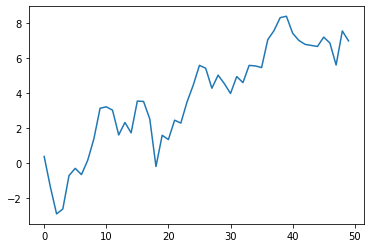

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.random.randn(50).cumsum())
plt.show()

In [24]:
a = 10
isinstance(a, int)

True

In [29]:
a = 20
b = 10.5
print(isinstance(a,(int,float)))
print(isinstance(b,(int,float)))

True
True


In [31]:
'{0:.2f} is the price of {1:s} in {2:d}'.format(100.1234, 'Bread', 2019)

'100.12 is the price of Bread in 2019'

In [34]:
s = 'Hello'
s

'Hello'

In [33]:
s

'Hello'

In [46]:
tup = ('Hello', [1,2], True)

In [47]:
tup[2] = False

TypeError: 'tuple' object does not support item assignment

In [48]:
tup[1].append(3)
print(tup)
# If there is mutable object within the tuple, then we can modify it

('Hello', [1, 2, 3], True)


In [51]:
a, b = 3, 4
b, a = a, b #Swap of two numbers
print(a, b)

4 3


In [52]:
values = 1, 2, 3, 4, 5
print(type(values))

<class 'tuple'>


In [53]:
a, b, c = values

ValueError: too many values to unpack (expected 3)

In [61]:
a, b, *c = values
print(a, b, c, sep=' * ')
a, b, *_ = values # Use _ for unwanted variables
print(a, b)

1 * 2 * [3, 4, 5]
1 2


In [63]:
l1 = [1,2,3]
l1.append([4,5])
print(l1)

[1, 2, 3, [4, 5]]


In [64]:
l2 = [1,2,3]
l2.extend([4,5])
print(l2)

[1, 2, 3, 4, 5]


In [65]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'),('Schilling', 'Curt')]
first_name, last_name = zip(*pitchers) # Unzipping zipped object (Converting list of rows into list of columns)
print(first_name, last_name)

('Nolan', 'Roger', 'Schilling') ('Ryan', 'Clemens', 'Curt')


In [70]:
pitchers = zip(first_name, last_name)
print(pitchers) # Return zipped object
print(list(pitchers)) # Convert zipped object into list to print

[('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]


In [92]:
# Creating dictionary from zipped object
name = ['Saif', 'Biswarup','Honey']
roll = [98, 31, 44]
college = zip(roll, name)
print(list(college))

[(98, 'Saif'), (31, 'Biswarup'), (44, 'Honey')]


In [93]:
college_dict = {}
for roll, name in list(zip(roll, name)):
    college_dict[roll] = name
print(college_dict)

{98: 'Saif', 31: 'Biswarup', 44: 'Honey'}


In [94]:
list(college)

[]

In [87]:
list(zip(roll, name))

[(98, 'Saif'), (31, 'Biswarup'), (44, 'Honey')]

In [96]:
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'],
            ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
# Find the names in `all_data` which have two 'e's using list comprehension

In [97]:
[name for names in all_data for name in names if name.count('e')>=2]
# element for outer_list_index(1D list) in 2Dlist for inner_list_index / element in outer_list_index(1D list) # Syntax

['Steven']

In [99]:
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
# Flatten the data
flat = [x for y in some_tuples for x in y]
print(flat)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Function as an object

In [121]:
import re
states = ['   Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda','south   carolina##', 'West virginia?']

def remove_punctuation(string):
    return re.sub('[!#?]', '', string)

clean_ops = [str.strip, remove_punctuation, str.title]


result = []
for value in states:
    for function in clean_ops:
        value = function(value)
    result.append(value)
print(result)

['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia']


In [123]:
for x in map(remove_punctuation,states):
    print(x)

   Alabama 
Georgia
Georgia
georgia
FlOrIda
south   carolina
West virginia


In [4]:
x = print(3)
print(x)
print(type(x))

3
None
<class 'NoneType'>


There are three types of scope -
* Global scope
* Local scope
* Built-in scope (Accessed by `import builtins` and `dir(builtins)`)

In [8]:
new_val = 100
def square(value):
    global new_val # used to alter the value of global variable using a function
    new_val = value ** 2
    return new_val
print(square(3))
print(new_val)

9
9


### Inner Functions

In [11]:
def mod2plus5(x1, x2, x3):
    """Returns the remainder plus 5 of three values."""
    new_x1 = x1 % 2 + 5    
    new_x2 = x2 % 2 + 5 
    new_x3 = x3 % 2 + 5
    return (new_x1, new_x2, new_x3)
print(mod2plus5(1, 2, 3))

(6, 5, 6)


In [12]:
# Example of nested function
def mod2plus5(x1, x2, x3):
    """Returns the remainder plus 5 of three values."""
    def inner(x):
        return x%2+5
    return (inner(x1), inner(x2), inner(x3))

print(mod2plus5(1, 2, 3))

(6, 5, 6)


In [13]:
# Example of function return
def raise_val(n):
    
    def inner(x):
        raised = x ** n
        return raised
    
    return inner

square = raise_val(2)
cube = raise_val(3)
print(square(5))
print(cube(5))

25
125


In [1]:
# Example of nonlocal scope to access variable of outer function from inner function
def echo_shout(word):
    """Change the value of a nonlocal variable"""
    echo_word = word + word
    print(echo_word)
    
    # Define inner function shout()
    def shout():
        """Alter a variable in the enclosing scope"""    
        nonlocal echo_word
        echo_word = echo_word + '!!!'
    shout()
    print(echo_word)
echo_shout('hello')

hellohello
hellohello!!!


In [2]:
# Example of variable length arguments
def gibberish(*args):
    """Concatenate strings in *args together."""
    hodgepodge = ''
    for word in args:
        hodgepodge += word
    return hodgepodge

one_word = gibberish("luke")

many_words = gibberish("luke", "leia", "han", "obi", "darth")

print(one_word)
print(many_words)

luke
lukeleiahanobidarth


In [3]:
# Example of keyword arguments

def report_status(**kwargs):
    """Print out the status of a movie character."""

    print("\nBEGIN: REPORT\n")

    # Iterate over the key-value pairs of kwargs
    for k, v in kwargs.items():
        print(k + ": " + v)

    print("\nEND REPORT")

report_status(name="luke", affiliation="jedi", status="missing")

report_status(name="anakin", affiliation="sith lord", status="deceased")


BEGIN: REPORT

name: luke
affiliation: jedi
status: missing

END REPORT

BEGIN: REPORT

name: anakin
affiliation: sith lord
status: deceased

END REPORT


In [4]:
# Using filter with lambda function
fellowship = ['frodo', 'samwise', 'merry', 'pippin', 'aragorn', 'boromir', 'legolas', 'gimli', 'gandalf']
result = filter(lambda x: len(x) > 6, fellowship) # filter out the element for which lambda function return False
result_list = list(result)
print(result_list)

['samwise', 'aragorn', 'boromir', 'legolas', 'gandalf']


In [7]:
# Solution of gibberish function using reduce and lambda

l = ["luke", "leia", "han", "obi", "darth"]
from functools import reduce
many_words = reduce(lambda item1, item2 : item1 + item2, l)
print(many_words)

lukeleiahanobidarth


In [9]:
# Find maximum value element in the list
l = [21, 42, 2, 89, -4]
maximum = reduce(lambda a, b: a if a > b else b, l)
print(maximum)

89


In [14]:
import operator
print("The concatenated product is : ",end="") 
print(reduce(operator.add,["geeks","for","geeks"])) 

The concatenated product is : geeksforgeeks


### Not all iterables are actual lists. `range()` doesn't actually create the list; instead, it creates a range object with an iterator that produces the values until it reaches the limit

### zip() function returns a zipped object that produces an iterator of tuples based on the iterable objects that is zipped. If a single iterable is passed, zip() returns an iterator of tuples with each tuple having only one element.

### enumerate() returns an enumerate object that produces an iterator of tuples, and each of the tuples is an index-value pair.

### Python for loop is an iterator based for loop. for loop is automatically calls iter on the iterable object to get an iterator and then calling next over and over until a StopIteration exception is raised.

In [17]:
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']
for i, v in enumerate(mutants, start = 1):
    print(str(i)+ ": " + v)

1: charles xavier
2: bobby drake
3: kurt wagner
4: max eisenhardt
5: kitty pryde


In [28]:
mutants = ('charles xavier',
 'bobby drake',
 'kurt wagner',
 'max eisenhardt',
 'kitty pryde')
powers = ('telepathy',
 'thermokinesis',
 'teleportation',
 'magnetokinesis',
 'intangibility')

z1 = zip(mutants, powers)
print(*z1) # Unzipping while printing

z1 = zip(mutants, powers) # Re-zip
tuple1, tuple2 = zip(*z1)
print(tuple1)
print(tuple2)

z1 = zip(mutants, powers) # Re-zip
result = dict(z1)
print(result)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
('charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde')
('telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility')
{'charles xavier': 'telepathy', 'bobby drake': 'thermokinesis', 'kurt wagner': 'teleportation', 'max eisenhardt': 'magnetokinesis', 'kitty pryde': 'intangibility'}


In [25]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
new_fellowship = [member for member in fellowship if len(member)>= 7] # Updated list containing names whose length >= 7
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [26]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
new_fellowship = [member if len(member)>=7 else "" for member in fellowship]
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [27]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']
new_fellowship = {member:len(member) for member in fellowship}
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


### Generator is like a list comprehension, but it does not create list in memory. It creates a generator object that can be iterated over to produce element of a list as required.